QUIZ TEST

In [5]:
import random
N = 20
position = 0
left = 0
right = 0
no_val =0
for t in range(100000):
    if random.uniform(0.0, 1.0) < 0.5:
        position = (position + 1) % N
        right +=1 
        
    elif random.uniform(0.0, 1.0) > 0.5:
        position = (position - 1) % N
        left += 1
    else:
        no_val +=1



In [6]:
right

50177

In [7]:
left

25042

In [8]:
no_val

24781

In [9]:
import random
N = 20
position = 0
left = 0
right = 0
for t in range(100000):
    dir = random.choice([-1, 1])
    if dir == 1:
        right +=1 
    else:
        left += 1
    #position = (position + dir) % N

In [10]:
right

50062

In [178]:
right/100000

0.50049

In [11]:
right

50062

In [21]:
import random
N = 20
position = 0
left = 0
right = 0
for t in range(100000):
    if random.uniform(0.0, 1.0) < 0.5:
        right +=1 
        position = (position + 1) % N
    else:
        position = (position - 1) % N
        left += 1

In [22]:
right

50049

In [23]:
left

49951

In [24]:
right+left

100000

### week 1 homework 

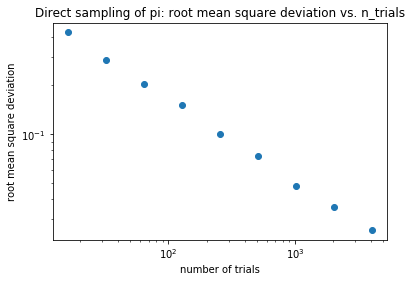

In [68]:
%matplotlib inline  

import random, math, pylab

def direct_pi(N):
    n_hits = 0
    for i in range(N):
        x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
        if x ** 2 + y ** 2 < 1.0:
            n_hits += 1
    return n_hits

n_runs = 500
n_trials_list = []
sigmasqs = []
for poweroftwo in range(4, 13):
    n_trials = 2 ** poweroftwo
    sigmasq = 0.0
    for run in range(n_runs):
        pi_est = 4.0 * direct_pi(n_trials) / float(n_trials)
        sigmasq += (pi_est - math.pi) ** 2
    sigmasqs.append(math.sqrt(sigmasq/(n_runs)))
    n_trials_list.append(n_trials)

pylab.plot(n_trials_list, sigmasqs, 'o')
pylab.xscale('log')
pylab.yscale('log')
pylab.xlabel('number of trials')
pylab.ylabel('root mean square deviation')
pylab.title('Direct sampling of pi: root mean square deviation vs. n_trials')
pylab.savefig('direct_sampling_rms_deviation.png')
pylab.show()

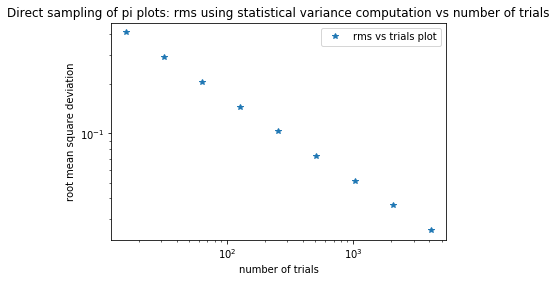

In [155]:
%matplotlib inline  

import random, math, pylab
import numpy as np

def direct_pi(N):
    n_hits = 0
    for i in range(N):
        x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
        if x ** 2 + y ** 2 < 1.0:
            n_hits += 1
    return n_hits

n_runs = 500
n_trials_list = []
#########added variable #####
func_trials  = []
constant_var = 1.642
##########################
sigmasqs = []
for poweroftwo in range(4, 13):
    n_trials = 2 ** poweroftwo
    sigmasq = 0.0
    for run in range(n_runs):
        pi_est = 4.0 * direct_pi(n_trials) / float(n_trials)
        sigmasq += (pi_est - math.pi) ** 2
    sigmasqs.append(math.sqrt(sigmasq/(n_runs)))
    
    ######### added function to be computed #####
    n_trials_list.append(n_trials)
    # 1.642 / sqrt(N_trials)
    func_trials.append(constant_var/math.sqrt(float(n_trials)))
    ##############################################
    
#pylab.plot(n_trials_list, sigmasqs, 'o', label = 'rms deviation')
##############################################
pylab.plot(n_trials_list, func_trials, '*', label = 'rms vs trials plot')
##############################################


pylab.xscale('log')
pylab.yscale('log')
pylab.xlabel('number of trials')
pylab.legend(loc='upper right')
pylab.ylabel('root mean square deviation')
pylab.title('Direct sampling of pi plots: rms using statistical variance computation vs number of trials')
pylab.savefig('direct_sampling_rms_stats_approach.png')
pylab.show()

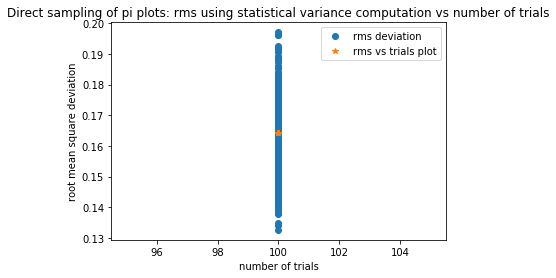

In [243]:
%matplotlib inline  

import random, math, pylab
import numpy as np

def direct_pi(N):
    n_hits = 0
    for i in range(N):
        x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
        if x ** 2 + y ** 2 < 1.0:
            n_hits += 1
    return n_hits

n_runs = 100
n_trials_list = []
#########added variable #####
func_trials  = []
constant_var = 1.642
##########################
sigmasqs = []
for poweroftwo in range(4, 500):
    n_trials = 100 # 
    sigmasq = 0.0
    for run in range(n_runs):
        pi_est = 4.0 * direct_pi(n_trials) / float(n_trials)
        sigmasq += (pi_est - math.pi) ** 2
    sigmasqs.append(math.sqrt(sigmasq/(n_runs))) 
    ######### added function to be computed #####
    n_trials_list.append(n_trials)
    # 1.642 / sqrt(N_trials)
    func_trials.append(constant_var/math.sqrt(float(n_trials)))
    ##############################################
    
pylab.plot(n_trials_list, sigmasqs, 'o', label = 'rms deviation')
##############################################
pylab.plot(n_trials_list, func_trials, '*', label = 'rms vs trials plot')
##############################################


#pylab.xscale('log')
#pylab.yscale('log')
pylab.xlabel('number of trials')
pylab.legend(loc='upper right')
pylab.ylabel('root mean square deviation')
pylab.title('Direct sampling of pi plots: rms using statistical variance computation vs number of trials')
pylab.savefig('direct_sampling_rms_stats_approach.png')
pylab.show()

In [244]:
np.mean(sigmasqs)

0.16335487714000013

In [245]:
func_trials[1]

0.16419999999999998

In [240]:
n_trials

50

        Section B

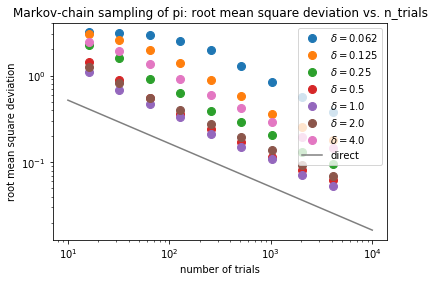

In [472]:
import random, math, pylab

def markov_pi(N, delta):
    x, y = 1.0, 1.0
    n_hits = 0
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        if x**2 + y**2 < 1.0: n_hits += 1
    return n_hits

n_runs = 500
for delta in [0.062, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]:
    n_trials_list = []
    sigmas = []
    for poweroftwo in range(4, 13):
        n_trials = 2 ** poweroftwo
        sigma = 0.0
        for run in range(n_runs):
            pi_est = 4.0 * markov_pi(n_trials, delta) / float(n_trials)
            sigma += (pi_est - math.pi) ** 2
        sigmas.append(math.sqrt(sigma/(n_runs)))
        n_trials_list.append(n_trials)
    pylab.plot(n_trials_list, sigmas, 'o', ms = 8, label = '$\delta = $' + str(delta))

pylab.xscale('log')
pylab.yscale('log')
pylab.xlabel('number of trials')
pylab.ylabel('root mean square deviation')
pylab.plot([10,10000],[1.642 / math.sqrt(10.0), 1.642 / math.sqrt(10000.0)], label = 'direct')
pylab.title('Markov-chain sampling of pi: root mean square deviation vs. n_trials')
pylab.legend(loc='upper right')
pylab.savefig('markov_sampling_rms_deviation.png')
pylab.show()

In [521]:
import random

x, y = 0., 0.
delta = 4.
n_trials = 2**12
n_hits = 0
for i in range(n_trials):
    del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
    
    if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
        x, y = x + del_x, y + del_y
    if x**2 + y**2 < 1.0: n_hits += 1
print (n_hits)
print (n_hits/float(n_trials))


3105
0.758056640625


In [469]:
n_trials

4096

In [27]:
import random
x, y = 1, 1

n_trials = 2**12

count =0
acceptance = []
for delta in [0.062, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]:
    
    summer =[]
    misses = []
    for poweroftwo in range(100):
        n_hits = 0
        miss = 0
        for i in range(n_trials):
            del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
            if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
                x, y = x + del_x, y + del_y
                n_hits += 1; 
            else: miss  += 1; 
            condition = x**2 + y**2
            if condition < 1.0:
                pass #n_hits += 1; 
            else: pass #miss  += 1; 
        #print(n_hits)
        summer.append(n_hits)
        misses.append(miss) 

          
    n_hits = np.mean(summer)
    miss = np.mean(miss)
    total = n_trials - n_hits
    
    accept = n_hits/float(n_trials)
    #acceptance.append((delta,accept,1-accept,n_trials,n_hits ,miss))
    acceptance.append((delta,accept))


In [28]:
acceptance

[(0.062, 0.96873291015625),
 (0.125, 0.9383642578125),
 (0.25, 0.87905029296875),
 (0.5, 0.7663427734375),
 (1.0, 0.56212890625),
 (2.0, 0.2495849609375),
 (4.0, 0.06181396484375)]

#  The solution below is wrong


In [23]:
import random
import numpy as np
x, y = 1, 1

n_trials = 2**12

count =0
acceptance = []
for delta in [0.062, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]:
    
    summer =[]
    misses = []
    for poweroftwo in range(100):
        n_hits = 0
        miss = 0
        for i in range(n_trials):
            del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
            if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
                x, y = x + del_x, y + del_y
            else: pass
            condition = x**2 + y**2
            if i > 1000:
                if condition < 1.0:
                    n_hits += 1; 
                else: miss  += 1; 
        #print(n_hits)
        summer.append(n_hits)
        misses.append(miss) 

          
    n_hits = np.mean(summer)
    miss = np.mean(miss)
    total = n_trials - n_hits
    
    accept = n_hits/float(n_trials)
    #acceptance.append((delta,accept,1-accept,n_trials,n_hits ,miss))
    acceptance.append((delta,accept))


In [24]:
acceptance

[(0.062, 0.58075927734375),
 (0.125, 0.5946240234375),
 (0.25, 0.5924462890625),
 (0.5, 0.59360107421875),
 (1.0, 0.593583984375),
 (2.0, 0.59778564453125),
 (4.0, 0.5945361328125)]

In [542]:
import random, math
n_trials = 400000
n_hits = 0
var = 0.0
for iter in range(n_trials):
    x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
    Obs = 0.0
    if x**2 + y**2 < 1.0:
        n_hits += 1
        Obs = 4.0
    var += (Obs - math.pi)**2
print (4.0 * n_hits / float(n_trials), math.sqrt(var / n_trials))

3.14414 1.6404115792622438


In [587]:
import random, math
import numpy as np
n_trials = 400000
n_hits = 0
var = 0.0

obs_squares_list = [] # observation square
obs_list = [] # observation

for delta in [0.062, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]:
    
    for iter in range(n_trials):
        x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
        Obs = 0.0
        obs_sq =0.

        if x**2 + y**2 < 1.0:
            n_hits += 1
            Obs = 4.0  # observation
            obs_sq = 16.0 # observation squared
        else:
            Obs = 0. # obs can be 4 ot 0. Here it is set to zero
            obs_sq=0. #  obs_sq can be 4 ot 0. Here it is set to zero
        obs_squares_list.append(obs_sq) # collect the obs
        obs_list.append(Obs)
var = np.mean(obs_squares_list) - np.mean(obs_list)**2 # compute variance from mean(obs^2)- mean(obs)^2
print (4.0 * n_hits / float(n_trials), math.sqrt(var )) # print out results

3.14185 1.6420044389404067


1048576
3.1511192321777344 mean value, estimate of pi
3.1511192321777344 mean value, estimate of pi
3.1511192321777344 mean value, estimate of pi
3.1511192321777344 mean value, estimate of pi
3.1511192321777344 mean value, estimate of pi
3.1511192321777344 mean value, estimate of pi
3.1511192321777344 mean value, estimate of pi
3.1511192321777344 mean value, estimate of pi
3.1511192321777344 mean value, estimate of pi
3.1511192321777344 mean value, estimate of pi
3.1511192321777344 mean value, estimate of pi
3.1511192321777344 mean value, estimate of pi
3.1511192321777344 mean value, estimate of pi
3.1511192321777344 mean value, estimate of pi
3.1511192321777344 mean value, estimate of pi
3.1511192321777344 mean value, estimate of pi
3.1511192321777344 mean value, estimate of pi
3.1511192321777344 mean value, estimate of pi
3.1511192321777344 mean value, estimate of pi
3.1511192321777344 mean value, estimate of pi


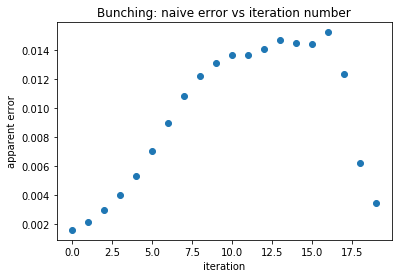

In [17]:
import random, pylab, math

def markov_pi_all_data(N, delta):
    x, y = 1.0, 1.0
    data = []
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        if x ** 2 + y ** 2 < 1.0:
            data.append(4.0)
        else:
            data.append(0.0)
    return data

poweroftwo = 20
n_trials = 2 ** poweroftwo
delta = 0.1
data = markov_pi_all_data(n_trials, delta)
print(len(data))
errors  = []
bunches = []
for i in range(poweroftwo):
    new_data = []
    mean = 0.0
    mean_sq = 0.0
    N = len(data)
    while data != []:
        x = data.pop()
        y = data.pop()
        mean += x + y
        mean_sq += x ** 2 + y ** 2
        new_data.append((x + y) / 2.0 )
    
    errors.append(math.sqrt(mean_sq / N - (mean / N) ** 2) / math.sqrt(N))
    bunches.append(i)
    
    data = new_data[:]
    
    print( mean / float(N), 'mean value, estimate of pi')
pylab.plot(bunches, errors, 'o')
pylab.xlabel('iteration')
pylab.ylabel('apparent error')
pylab.title('Bunching: naive error vs iteration number')
pylab.savefig('apparent_error_bunching.png')
pylab.show()